# CallGenes Benchmark Notebook

This notebook recreates the benchmarking visualizations. Run the cells in order to refresh the plots after generating new data.

## 1. Benchmarking (run_benchmarking_all.sh)

Reads `benchmarking_results_all/summary_results.csv` and aggregates tool-level precision/recall for starts and stops.

In [1]:
%%bash
# First, make sure to be in the right venv (run this as a bash cell)
source /clusterfs/jgi/scratch/gentech/genome_analysis/brandonimstepf/jgi_venv/bin/activate
pip install pandas matplotlib seaborn

In [2]:
import sys; print(sys.executable)

/clusterfs/jgi/scratch/gentech/genome_analysis/brandonimstepf/jgi_venv/bin/python


,Tool,TP_Start,FP_Start,FN_Start,TP_Stop,FP_Stop,FN_Stop,Precision_Start,Recall_Start,Precision_Stop,Recall_Stop
4,GeneMarkS2,36917,5474,6722,41470,921,2169,0.870869,0.845963,0.978274,0.950297
6,Prodigal,36408,6135,7231,41286,1257,2353,0.855793,0.834300,0.970453,0.946080
1,CallGenes-2pass,35762,6364,7877,41030,1096,2609,0.848929,0.819496,0.973983,0.940214
3,CallGenes-NN-2pass,35693,6299,7946,40908,1084,2731,0.849995,0.817915,0.974186,0.937418
0,CallGenes-1pass,34827,6766,8812,40507,1086,3132,0.837328,0.798071,0.973890,0.928229
2,CallGenes-NN-1pass,34870,6552,8769,40342,1080,3297,0.841823,0.799056,0.973927,0.924448
5,Glimmer,10496,32020,33143,14398,28118,29252,0.246872,0.240519,0.338649,0.329851


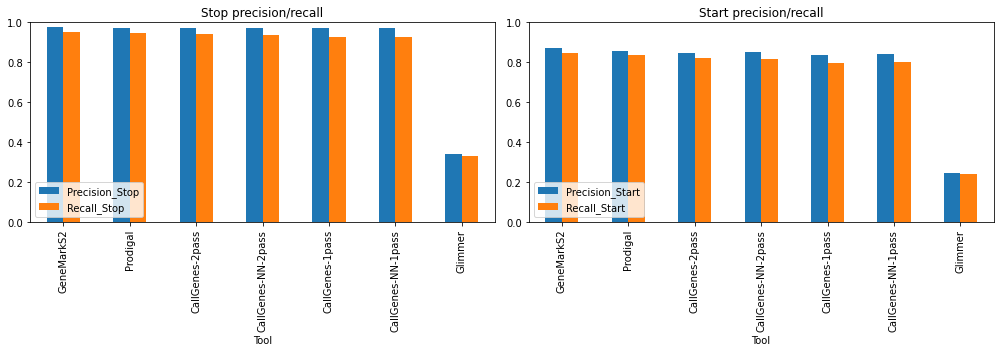

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

summary_path = Path('..') / 'benchmarking_results_all' / 'summary_results.csv'
if not summary_path.exists():
    raise FileNotFoundError(f'Missing {summary_path}. Run run_benchmarking_all.sh first.')

df = pd.read_csv(summary_path)
tool_metrics = []
for tool, group in df.groupby('Tool'):
    agg = group[['TP_Start','TP_Stop','FP_Start','FP_Stop','FN_Start','FN_Stop']].sum()
    precision_start = agg['TP_Start'] / (agg['TP_Start'] + agg['FP_Start'])
    recall_start = agg['TP_Start'] / (agg['TP_Start'] + agg['FN_Start'])
    precision_stop = agg['TP_Stop'] / (agg['TP_Stop'] + agg['FP_Stop'])
    recall_stop = agg['TP_Stop'] / (agg['TP_Stop'] + agg['FN_Stop'])
    tool_metrics.append({
        'Tool': tool,
        'TP_Start': agg['TP_Start'],
        'FP_Start': agg['FP_Start'],
        'FN_Start': agg['FN_Start'],
        'TP_Stop': agg['TP_Stop'],
        'FP_Stop': agg['FP_Stop'],
        'FN_Stop': agg['FN_Stop'],
        'Precision_Start': precision_start,
        'Recall_Start': recall_start,
        'Precision_Stop': precision_stop,
        'Recall_Stop': recall_stop
    })
tool_df = pd.DataFrame(tool_metrics).sort_values('Recall_Stop', ascending=False)
display(tool_df)

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=False)
tool_df.plot(x='Tool', y=['Precision_Stop','Recall_Stop'], kind='bar', ax=axes[0], title='Stop precision/recall')
tool_df.plot(x='Tool', y=['Precision_Start','Recall_Start'], kind='bar', ax=axes[1], title='Start precision/recall')
for ax in axes:
    ax.set_ylim(0,1)
    ax.legend(loc='lower left')
plt.tight_layout()
plt.show()


## 2. CallGenes multiplier sweep

Aggregates metrics from `callgenes_mode_results_*` folders to compare multiplier strategies (ratio, advisory, exponential, direct_only, etc.).

,mode,pass,TP_Start,FP_Start,FN_Start,TP_Stop,FP_Stop,FN_Stop,precision_start,recall_start,precision_stop,recall_stop
0,ratio,single_pass,34696,6619,8943,40333,982,3306,0.839792,0.795069,0.976231,0.924242
1,ratio,single_pass_nn,34146,7126,9493,39997,1275,3642,0.827341,0.782465,0.969107,0.916543
2,ratio,two_pass,35630,6217,8009,40854,993,2785,0.851435,0.816472,0.976271,0.936181
3,ratio,two_pass_nn,34831,6825,8808,40363,1293,3276,0.836158,0.798162,0.968960,0.924930
4,ratio_pow2,single_pass,34696,6619,8943,40333,982,3306,0.839792,0.795069,0.976231,0.924242
5,ratio_pow2,single_pass_nn,33264,7669,10375,39367,1566,4272,0.812645,0.762254,0.961742,0.902106
6,ratio_pow2,two_pass,35630,6217,8009,40854,993,2785,0.851435,0.816472,0.976271,0.936181
7,ratio_pow2,two_pass_nn,33895,7262,9744,39607,1550,4032,0.823554,0.776713,0.962339,0.907606
8,ratio_pow3,single_pass,34696,6619,8943,40333,982,3306,0.839792,0.795069,0.976231,0.924242
9,ratio_pow3,single_pass_nn,32693,7895,10946,38935,1653,4704,0.805484,0.749169,0.959274,0.892207


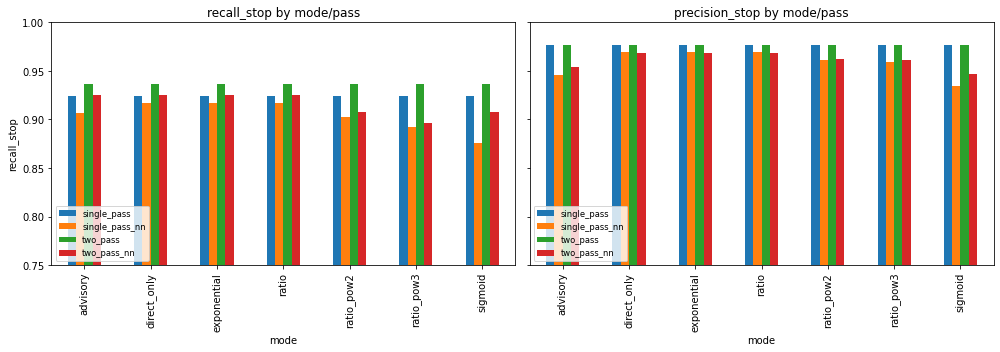

In [4]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

base = Path('..')
multiplier_modes = ['ratio','ratio_pow2','ratio_pow3','advisory','sigmoid','exponential','direct_only']
passes = ['single_pass','single_pass_nn','two_pass','two_pass_nn']
records = []
for mode in multiplier_modes:
    csv_path = base / f'callgenes_mode_results_{mode}' / 'summary_results_callgenes.csv'
    if not csv_path.exists():
        continue
    df_mode = pd.read_csv(csv_path)
    for pass_name in passes:
        subset = df_mode[df_mode['Mode'] == pass_name]
        if subset.empty:
            continue
        agg = subset[['TP_Start','TP_Stop','FP_Start','FP_Stop','FN_Start','FN_Stop']].sum()
        precision_start = agg['TP_Start'] / (agg['TP_Start'] + agg['FP_Start']) if (agg['TP_Start'] + agg['FP_Start']) else 0
        recall_start = agg['TP_Start'] / (agg['TP_Start'] + agg['FN_Start']) if (agg['TP_Start'] + agg['FN_Start']) else 0
        precision_stop = agg['TP_Stop'] / (agg['TP_Stop'] + agg['FP_Stop']) if (agg['TP_Stop'] + agg['FP_Stop']) else 0
        recall_stop = agg['TP_Stop'] / (agg['TP_Stop'] + agg['FN_Stop']) if (agg['TP_Stop'] + agg['FN_Stop']) else 0
        records.append({
            'mode': mode,
            'pass': pass_name,
            'TP_Start': agg['TP_Start'],
            'FP_Start': agg['FP_Start'],
            'FN_Start': agg['FN_Start'],
            'TP_Stop': agg['TP_Stop'],
            'FP_Stop': agg['FP_Stop'],
            'FN_Stop': agg['FN_Stop'],
            'precision_start': precision_start,
            'recall_start': recall_start,
            'precision_stop': precision_stop,
            'recall_stop': recall_stop
        })
metrics = pd.DataFrame(records)
display(metrics)
if not metrics.empty:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)
    for ax, metric in zip(axes, ['recall_stop','precision_stop']):
        pivot = metrics.pivot(index='mode', columns='pass', values=metric)
        pivot.plot(kind='bar', ax=ax, title=f'{metric} by mode/pass')
        ax.set_ylabel(metric)
        ax.set_ylim(0.75, 1.0)
        ax.legend(loc='lower left', fontsize='small')
    plt.tight_layout()
    plt.show()


## 3. Score Modifier Histograms

This cell scans every `scores.csv` (produced when `log=t truegenes=...` is set) and summarizes the ratio `Modified_Score / Original_Score` by status (TP/FP) per multiplier mode.

,mode,scores_path,status,count,avg_multiplier,median_multiplier
0,ratio,scores.csv,FP,22251,0.694377,0.738519
1,ratio,scores.csv,TP,3431,0.960838,0.916693
2,ratio,scores.csv,FP,23227,0.690772,0.737426
3,ratio,scores.csv,TP,3502,1.001643,0.919367
4,ratio,scores.csv,FP,26790,0.699346,0.737677
...,...,...,...,...,...,...
275,direct_only,scores.csv,TP,5116,1.314490,1.475497
276,direct_only,scores.csv,FP,15201,0.694675,0.723257
277,direct_only,scores.csv,TP,4116,1.165745,1.049937
278,direct_only,scores.csv,FP,12035,0.700889,0.723792


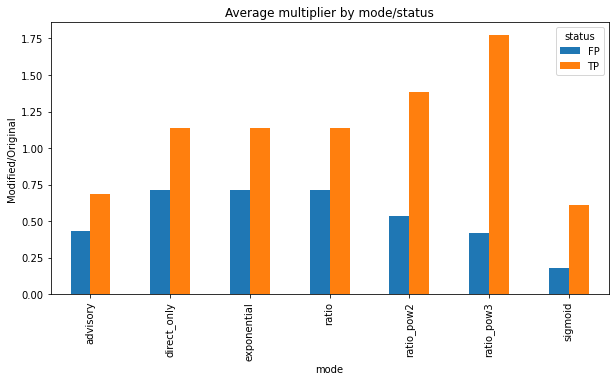

In [5]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

base = Path('..')
multiplier_modes = ['ratio','ratio_pow2','ratio_pow3','advisory','sigmoid','exponential','direct_only']
rows = []
for mode in multiplier_modes:
    mode_dir = base / f'callgenes_mode_results_{mode}'
    if not mode_dir.exists():
        continue
    for scores_path in mode_dir.rglob('scores.csv'):
        df = pd.read_csv(scores_path)
        if 'Original_Score' not in df or 'Modified_Score' not in df:
            continue
        df = df.replace({'Original_Score': {0: pd.NA}}).dropna(subset=['Original_Score'])
        df['multiplier'] = df['Modified_Score'] / df['Original_Score']
        for status, group in df.groupby('Status'):
            rows.append({
                'mode': mode,
                'scores_path': scores_path.name,
                'status': status,
                'count': len(group),
                'avg_multiplier': group['multiplier'].mean(),
                'median_multiplier': group['multiplier'].median()
            })
mult_df = pd.DataFrame(rows)
display(mult_df)
if not mult_df.empty:
    pivot = mult_df.pivot_table(index='mode', columns='status', values='avg_multiplier')
    pivot.plot(kind='bar', figsize=(10,5), title='Average multiplier by mode/status')
    plt.ylabel('Modified/Original')
    plt.show()


In [ ]:
score_path = r'/clusterfs/jgi/scratch/gentech/genome_analysis/brandonimstepf/callgenes_modes_20251119_113903/ratio/GCF_002000945.1_ASM200094v1_genomic.single_pass_nn/scores.csv'

df_scores = pd.read_csv(score_path)
# Orig score column 2, modified score column 3, advisory score column 4, status (TP/FP) column 5
# Print first few rows
print(df_scores.head())
# Display average advisory score for TPs and FPs

                            ORF_ID  Original_Score  Modified_Score  Length  \
ORF_ID              Original_Score  Modified_Score  Advisory_Score  Length   
NZ_CP009187.1_0          1212.2224       1208.5917          0.5982    1524   
NZ_CP009187.1_3483        334.3634        250.5742          0.4496     954   
NZ_CP009187.1_3567        288.6312        215.2270          0.4474     870   
NZ_CP009187.1_3600        297.6070        183.4817          0.3699     837   

                    Status  
ORF_ID              Status  
NZ_CP009187.1_0         TP  
NZ_CP009187.1_3483      FP  
NZ_CP009187.1_3567      FP  
NZ_CP009187.1_3600      FP  


KeyError: 'Advisory_Score'